# Data Preparation and Analysis

In [118]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Analysing Winners

In [40]:
winners=pd.read_csv('winners.csv')


In [41]:
winners.head()

,SerialNo,Candidate,Constituency,Party,CriminalCases,Education,Assest,Liabilities
0,1,A M Ariff,ALAPPUZHA,CPI(M),2.0,Graduate Professional,"Rs 1,52,68,906","Rs 22,20,700,"
1,2,A Narayanaswamy,CHITRADURGA,BJP,NaN,Graduate,"Rs 9,61,97,642","Rs 0,"
2,3,A. Raja,NILGIRIS,DMK,6.0,Graduate Professional,"Rs 4,95,91,024","Rs 14,24,914,"
3,4,Abdul Khaleque,BARPETA,INC,NaN,Post Graduate,"Rs 73,98,753","Rs 27,03,693,"
4,5,Abhishek Banerjee,DIAMOND HARBOUR,AITC,NaN,Graduate,"Rs 1,37,94,320","Rs 0,"


In [42]:
winners.shape

(539, 8)

In [43]:
winners.Constituency=winners.Constituency.str.replace('-',' ')
#winners.Candidate=winners.Candidate.str.replace('\t',' ')
winners['pc_name']=winners.Constituency.str.lower()
winners.drop('Constituency',axis=1,inplace=True)
winners['CriminalCases'].fillna(0 , inplace=True)

In [44]:
winners.head()

,SerialNo,Candidate,Party,CriminalCases,Education,Assest,Liabilities,pc_name
0,1,A M Ariff,CPI(M),2.0,Graduate Professional,"Rs 1,52,68,906","Rs 22,20,700,",alappuzha
1,2,A Narayanaswamy,BJP,0.0,Graduate,"Rs 9,61,97,642","Rs 0,",chitradurga
2,3,A. Raja,DMK,6.0,Graduate Professional,"Rs 4,95,91,024","Rs 14,24,914,",nilgiris
3,4,Abdul Khaleque,INC,0.0,Post Graduate,"Rs 73,98,753","Rs 27,03,693,",barpeta
4,5,Abhishek Banerjee,AITC,0.0,Graduate,"Rs 1,37,94,320","Rs 0,",diamond harbour


In [45]:
len(winners.pc_name.unique())

536

In [46]:
winners[winners['pc_name'].duplicated(keep=False)]

,SerialNo,Candidate,Party,CriminalCases,Education,Assest,Liabilities,pc_name
35,36,Anurag Singh Thakur,BJP,3.0,Graduate,"Rs 5,67,70,463","Rs 10,85,145,",hamirpur
197,198,Imtiaz Jaleel Syed,AIMIM,4.0,Post Graduate,"Rs 2,95,62,768","Rs 68,00,000,",aurangabad
204,205,Janardan Singh Sigriwal,BJP,5.0,Graduate,"Rs 1,04,51,986","Rs 3,76,000,",maharajganj
257,258,Kunwar Pushpendra Singh,BJP,4.0,Post Graduate,"Rs 16,71,59,924","Rs 3,55,02,582,",hamirpur
323,324,Pankaj Choudhary,BJP,5.0,12th Pass,"Rs 37,18,27,109","Rs 44,83,048,",maharajganj
496,497,Sushil Kumar Singh,BJP,3.0,Post Graduate,"Rs 16,78,95,109","Rs 37,46,607,",aurangabad


In [47]:
unique_winner_pc=list(winners.pc_name.unique())

In [48]:
winners[winners.pc_name.str.strip()=='akbarpur']

,SerialNo,Candidate,Party,CriminalCases,Education,Assest,Liabilities,pc_name


# Analysing Geo Data

In [49]:
geo_data=gpd.read_file('india_pc_2019_simplified.geojson')
geo_data.head()

,pc_id,st_code,st_name,pc_no,pc_name,pc_name_hi,pc_category,wikidata_qid,status,2019_election_phase,2019_election_date,geometry
0,201,2,Himachal Pradesh,1,Kangra,कांगड़ा,GEN,Q6362861,None,7,2019-05-19,"(POLYGON ((76.577 33.206, 76.598 33.204, 76.61..."
1,202,2,Himachal Pradesh,2,Mandi,मंडी,GEN,Q6748042,None,7,2019-05-19,"(POLYGON ((76.795 33.256, 76.81999999999999 33..."
2,203,2,Himachal Pradesh,3,Hamirpur,हमीरपुर,GEN,Q5645333,None,7,2019-05-19,"(POLYGON ((76.02 32.14, 76.04300000000001 32.0..."
3,204,2,Himachal Pradesh,4,Shimla,शिमला,SC,Q7496887,None,7,2019-05-19,"(POLYGON ((78.09399999999999 31.419, 78.162000..."
4,301,3,Punjab,1,Gurdaspur,गुरदासपुर,GEN,Q5619909,None,7,2019-05-19,"(POLYGON ((75.843 32.503, 75.902 32.453, 75.93..."


In [50]:
geo_data.pc_name=geo_data.pc_name.str.replace('-',' ')
geo_data.pc_name=geo_data.pc_name.str.lower()

In [51]:
geo_data.head()

,pc_id,st_code,st_name,pc_no,pc_name,pc_name_hi,pc_category,wikidata_qid,status,2019_election_phase,2019_election_date,geometry
0,201,2,Himachal Pradesh,1,kangra,कांगड़ा,GEN,Q6362861,None,7,2019-05-19,"(POLYGON ((76.577 33.206, 76.598 33.204, 76.61..."
1,202,2,Himachal Pradesh,2,mandi,मंडी,GEN,Q6748042,None,7,2019-05-19,"(POLYGON ((76.795 33.256, 76.81999999999999 33..."
2,203,2,Himachal Pradesh,3,hamirpur,हमीरपुर,GEN,Q5645333,None,7,2019-05-19,"(POLYGON ((76.02 32.14, 76.04300000000001 32.0..."
3,204,2,Himachal Pradesh,4,shimla,शिमला,SC,Q7496887,None,7,2019-05-19,"(POLYGON ((78.09399999999999 31.419, 78.162000..."
4,301,3,Punjab,1,gurdaspur,गुरदासपुर,GEN,Q5619909,None,7,2019-05-19,"(POLYGON ((75.843 32.503, 75.902 32.453, 75.93..."


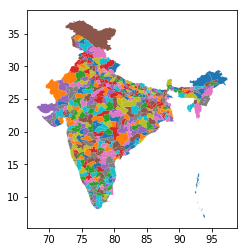

In [52]:
geo_data.plot(column='pc_name')


In [53]:
geo_data.shape

(543, 12)

In [54]:
len(geo_data.pc_name)

543

In [56]:
unique_geo_pc=list(geo_data.pc_name.unique())

In [57]:
len(unique_geo_pc)

539

In [58]:
geo_data[geo_data['pc_name'].duplicated(keep=False)]

,pc_id,st_code,st_name,pc_no,pc_name,pc_name_hi,pc_category,wikidata_qid,status,2019_election_phase,2019_election_date,geometry
2,203,2,Himachal Pradesh,3,hamirpur,हमीरपुर,GEN,Q5645333,None,7,2019-05-19,"(POLYGON ((76.02 32.14, 76.04300000000001 32.0..."
118,947,9,Uttar Pradesh,47,hamirpur,हमीरपुर,GEN,Q5645332,None,4,2019-04-29,"(POLYGON ((79.36499999999999 25.171, 79.354 25..."
134,963,9,Uttar Pradesh,63,maharajganj,महाराजगंज,GEN,Q6733274,None,7,2019-05-19,"(POLYGON ((83.617 27.468, 83.831 27.369, 83.86..."
170,1019,10,Bihar,19,maharajganj,महराजगंज,GEN,Q6733273,None,6,2019-05-12,"(POLYGON ((84.592 26.314, 84.654 26.299, 84.65..."
180,1037,10,Bihar,37,aurangabad,औरंगाबाद,GEN,Q4822111,None,1,2019-04-11,"(POLYGON ((84.816 25.073, 84.834 25.061, 84.88..."
358,2719,27,Maharashtra,19,aurangabad,औरंगाबाद,GEN,Q3763786,None,3,2019-04-23,"(POLYGON ((75.21299999999999 20.498, 75.257000..."
387,2730,27,Maharashtra,30,mumbai south,मुंबई - दक्षिण,GEN,Q12446954,None,4,2019-04-29,"(POLYGON ((72.925 19.046, 72.95099999999999 19..."
388,2731,27,Maharashtra,31,mumbai south,मुंबई - दक्षिण,GEN,Q12446954,None,4,2019-04-29,"(POLYGON ((72.827 19.009, 72.857 19.005, 72.86..."


Calculation

In [59]:
list_a=sorted(list(set(unique_geo_pc) - set(unique_winner_pc))) # 30
#list_a
list_a=list_a[1:-5]+['thiruvallur', 'thoothukudi']
list_a

['anakapalli',
 'anantapuramu',
 'arambagh',
 'barrackpore',
 'belagavi',
 'bhuvanagiri',
 'chikballapur',
 'chikodi',
 'davangere',
 'firozepur',
 'haasan',
 'janjgir',
 'kanyakumari',
 'mahabubnagar',
 'mandsaur',
 'mavelikara',
 'mayiladuturai',
 'nowgong',
 'peddapalli',
 'thiruvallur',
 'thoothukudi']

In [60]:
list_b=sorted(list(set(unique_winner_pc) - set(unique_geo_pc))) # 31
list_b=list_b[:-5]+ ['nawgong',
 'peddapalle',
  'tiruvallur',            
 'thoothukkudi'
 ]
list_b

['anakapalle',
 'anantapur',
 'arambag',
 'barrackpur',
 'belgaum',
 'bhongir',
 'chikkballapur',
 'chikkodi',
 'davanagere',
 'firozpur',
 'hassan',
 'janjgir champa',
 'kanniyakumari',
 'mahbubnagar',
 'mandsour',
 'mavelikkara',
 'mayiladuthurai',
 'nawgong',
 'peddapalle',
 'tiruvallur',
 'thoothukkudi']

In [61]:
to_replace=dict(zip(list_a,list_b))
to_replace

{'anakapalli': 'anakapalle',
 'anantapuramu': 'anantapur',
 'arambagh': 'arambag',
 'barrackpore': 'barrackpur',
 'belagavi': 'belgaum',
 'bhuvanagiri': 'bhongir',
 'chikballapur': 'chikkballapur',
 'chikodi': 'chikkodi',
 'davangere': 'davanagere',
 'firozepur': 'firozpur',
 'haasan': 'hassan',
 'janjgir': 'janjgir champa',
 'kanyakumari': 'kanniyakumari',
 'mahabubnagar': 'mahbubnagar',
 'mandsaur': 'mandsour',
 'mavelikara': 'mavelikkara',
 'mayiladuturai': 'mayiladuthurai',
 'nowgong': 'nawgong',
 'peddapalli': 'peddapalle',
 'thiruvallur': 'tiruvallur',
 'thoothukudi': 'thoothukkudi'}

In [62]:
geo_data=geo_data.replace(to_replace=to_replace,value=None)

In [63]:
type(geo_data)

geopandas.geodataframe.GeoDataFrame

In [64]:
geo_data.head()


,pc_id,st_code,st_name,pc_no,pc_name,pc_name_hi,pc_category,wikidata_qid,status,2019_election_phase,2019_election_date,geometry
0,201,2,Himachal Pradesh,1,kangra,कांगड़ा,GEN,Q6362861,None,7,2019-05-19,"(POLYGON ((76.577 33.206, 76.598 33.204, 76.61..."
1,202,2,Himachal Pradesh,2,mandi,मंडी,GEN,Q6748042,None,7,2019-05-19,"(POLYGON ((76.795 33.256, 76.81999999999999 33..."
2,203,2,Himachal Pradesh,3,hamirpur,हमीरपुर,GEN,Q5645333,None,7,2019-05-19,"(POLYGON ((76.02 32.14, 76.04300000000001 32.0..."
3,204,2,Himachal Pradesh,4,shimla,शिमला,SC,Q7496887,None,7,2019-05-19,"(POLYGON ((78.09399999999999 31.419, 78.162000..."
4,301,3,Punjab,1,gurdaspur,गुरदासपुर,GEN,Q5619909,None,7,2019-05-19,"(POLYGON ((75.843 32.503, 75.902 32.453, 75.93..."


In [65]:
geo_data[geo_data.pc_name.str.strip()=='peddapalli']

,pc_id,st_code,st_name,pc_no,pc_name,pc_name_hi,pc_category,wikidata_qid,status,2019_election_phase,2019_election_date,geometry


We see that few constituencies in the geojson file have '-' in their name which is missing from the 2019 file.

a. A good approach would be to replace '-' with blank.

Currently : 

set(data_geo) - set(unique_cont_2019) # 30 applying a. reduced mismatch to 22

set(unique_cont_2019) - set(data_geo) # 31 -> 23

In [66]:
unique_geo_pc=list(geo_data.pc_name.str.lower())


In [67]:
list(set(unique_geo_pc) - set(unique_winner_pc))

['sasaram', 'vellore', 'virudhunagar', 'akbarpur']

In [68]:
joined=geo_data.merge(winners,on='pc_name')

In [69]:
def case_category(x):
    if x == 0:
        return '1:0'
    elif x in range(1,6):
        return '2:1-5'
    elif x in range(6,26):
        return '3:5-25'
    elif x in range(26,101):
        return '4:25-100'
    else :
        return '5:100+'


joined['CaseCategory']=joined['CriminalCases'].apply(case_category)

In [70]:
joined.head()

,pc_id,st_code,st_name,pc_no,pc_name,pc_name_hi,pc_category,wikidata_qid,status,2019_election_phase,2019_election_date,geometry,SerialNo,Candidate,Party,CriminalCases,Education,Assest,Liabilities,CaseCategory
0,201,2,Himachal Pradesh,1,kangra,कांगड़ा,GEN,Q6362861,None,7,2019-05-19,"(POLYGON ((76.577 33.206, 76.598 33.204, 76.61...",245,Kishan Kapoor,BJP,2.0,12th Pass,"Rs 8,58,41,247","Rs 36,05,161,",2:1-5
1,202,2,Himachal Pradesh,2,mandi,मंडी,GEN,Q6748042,None,7,2019-05-19,"(POLYGON ((76.795 33.256, 76.81999999999999 33...",384,Ram Swaroop Sharma,BJP,0.0,10th Pass,"Rs 1,57,24,337","Rs 7,83,963,",1:0
2,203,2,Himachal Pradesh,3,hamirpur,हमीरपुर,GEN,Q5645333,None,7,2019-05-19,"(POLYGON ((76.02 32.14, 76.04300000000001 32.0...",36,Anurag Singh Thakur,BJP,3.0,Graduate,"Rs 5,67,70,463","Rs 10,85,145,",2:1-5
3,203,2,Himachal Pradesh,3,hamirpur,हमीरपुर,GEN,Q5645333,None,7,2019-05-19,"(POLYGON ((76.02 32.14, 76.04300000000001 32.0...",258,Kunwar Pushpendra Singh,BJP,4.0,Post Graduate,"Rs 16,71,59,924","Rs 3,55,02,582,",2:1-5
4,947,9,Uttar Pradesh,47,hamirpur,हमीरपुर,GEN,Q5645332,None,4,2019-04-29,"(POLYGON ((79.36499999999999 25.171, 79.354 25...",36,Anurag Singh Thakur,BJP,3.0,Graduate,"Rs 5,67,70,463","Rs 10,85,145,",2:1-5


In [71]:
joined.shape

(545, 20)

# Visualisation and Insights
# Analysis of Criminal Cases

# 1. Distribution of MPs with Criminal Cases in different Contituencies along with %age of each category


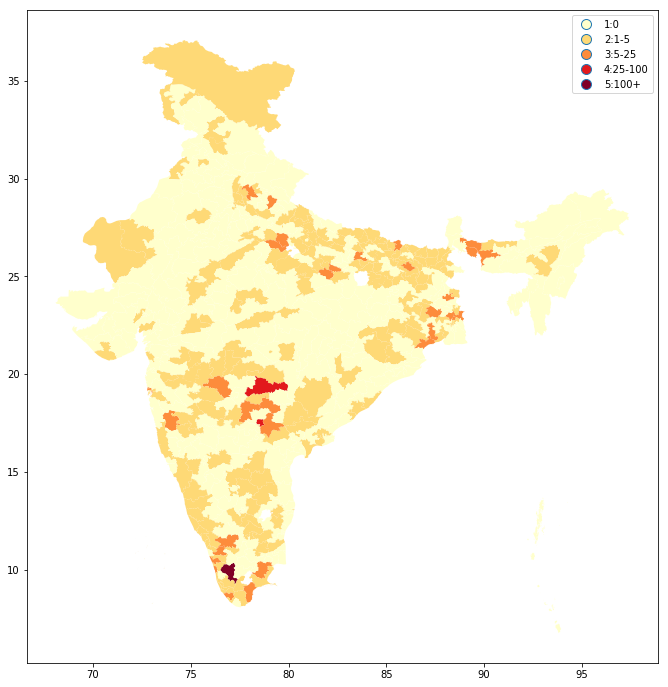

In [92]:
f,ax=plt.subplots(1,figsize=(12,12))
ax=joined.plot(ax=ax,column='CaseCategory',legend=True, cmap='YlOrRd')
plt.show()


In [163]:
joined[['CaseCategory','CriminalCases']].groupby('CaseCategory').count()*100/len(joined)

,CriminalCases
CaseCategory,
1:0,55.963303
2:1-5,37.431193
3:5-25,6.055046
4:25-100,0.366972
5:100+,0.183486


# Which State contributes more to polluting the Parliament

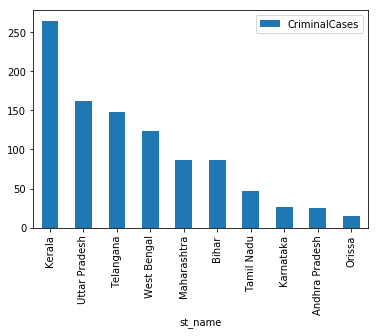

In [167]:
st_crime_top=joined[['st_name','CriminalCases']].groupby('st_name').sum().sort_values(by='CriminalCases',ascending=False)[:10]
st_crime_top.plot(kind='bar')

# Who are the most tainted MPs in the parliament

In [171]:
joined.sort_values(by='CriminalCases',ascending=False)[:5][['Candidate','pc_name','st_name','Party','CriminalCases','Education']]

,Candidate,pc_name,st_name,Party,CriminalCases,Education
469,Dean Kuriakose,idukki,Kerala,INC,204.0,Post Graduate
368,Bapu Rao Soyam,adilabad,Telangana,BJP,52.0,12th Pass
395,Anumula Revanth Reddy,malkajgiri,Telangana,INC,42.0,Graduate
227,Arjun Singh,barrackpur,West Bengal,BJP,24.0,10th Pass
393,B.B.Patil,zahirabad,Telangana,TRS,18.0,Graduate


# Which Party sent more tainted MPs to parliament

In [ ]:
# The Party State Combination

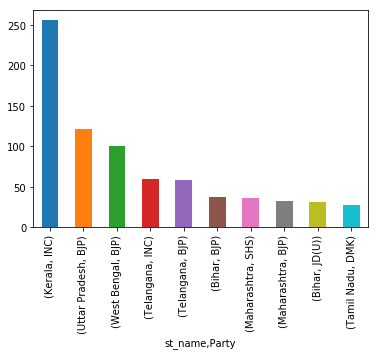

In [159]:

st_crime_top=joined.groupby(['st_name','Party']).sum().sort_values(by='CriminalCases',ascending=False)[:10]
#st_crime_top=st_crime_top.reset_index().set_index('st_name',drop=False)
st_crime_top['CriminalCases'].plot(kind='bar')
#st_crime_top


In [187]:
party_crime_top=joined[['Party','CriminalCases']].groupby('Party').sum().sort_values(by='CriminalCases',ascending=False)[:10]
party_crime_top['NoOfMP']=joined[['Party','CriminalCases']].groupby('Party').count().sort_values(by='CriminalCases',ascending=False)[:10]
#party_crime_top.plot(kind='bar')
party_crime_top

,CriminalCases,NoOfMP
Party,,
BJP,435.0,306.0
INC,354.0,51.0
SHS,36.0,18.0
JD(U),31.0,16.0
DMK,28.0,23.0
BSP,27.0,10.0
TRS,24.0,9.0
YSRCP,24.0,22.0
AITC,17.0,22.0


In [189]:
joined[joined.Party=='AIMIM']

,pc_id,st_code,st_name,pc_no,pc_name,pc_name_hi,pc_category,wikidata_qid,status,2019_election_phase,2019_election_date,geometry,SerialNo,Candidate,Party,CriminalCases,Education,Assest,Liabilities,CaseCategory
182,1037,10,Bihar,37,aurangabad,औरंगाबाद,GEN,Q4822111,None,1,2019-04-11,"(POLYGON ((84.816 25.073, 84.834 25.061, 84.88...",198,Imtiaz Jaleel Syed,AIMIM,4.0,Post Graduate,"Rs 2,95,62,768","Rs 68,00,000,",2:1-5
184,2719,27,Maharashtra,19,aurangabad,औरंगाबाद,GEN,Q3763786,None,3,2019-04-23,"(POLYGON ((75.21299999999999 20.498, 75.257000...",198,Imtiaz Jaleel Syed,AIMIM,4.0,Post Graduate,"Rs 2,95,62,768","Rs 68,00,000,",2:1-5
397,2809,36,Telangana,9,hyderabad,हैदराबाद,GEN,Q3764307,None,1,2019-04-11,"(POLYGON ((78.429 17.397, 78.43899999999999 17...",47,Asaduddin Owaisi,AIMIM,5.0,Graduate Professional,"Rs 17,90,44,376","Rs 12,05,00,000,",2:1-5


In [143]:
joined.head()

,pc_id,st_code,st_name,pc_no,pc_name,pc_name_hi,pc_category,wikidata_qid,status,2019_election_phase,2019_election_date,geometry,SerialNo,Candidate,Party,CriminalCases,Education,Assest,Liabilities,CaseCategory
0,201,2,Himachal Pradesh,1,kangra,कांगड़ा,GEN,Q6362861,None,7,2019-05-19,"(POLYGON ((76.577 33.206, 76.598 33.204, 76.61...",245,Kishan Kapoor,BJP,2.0,12th Pass,"Rs 8,58,41,247","Rs 36,05,161,",2:1-5
1,202,2,Himachal Pradesh,2,mandi,मंडी,GEN,Q6748042,None,7,2019-05-19,"(POLYGON ((76.795 33.256, 76.81999999999999 33...",384,Ram Swaroop Sharma,BJP,0.0,10th Pass,"Rs 1,57,24,337","Rs 7,83,963,",1:0
2,203,2,Himachal Pradesh,3,hamirpur,हमीरपुर,GEN,Q5645333,None,7,2019-05-19,"(POLYGON ((76.02 32.14, 76.04300000000001 32.0...",36,Anurag Singh Thakur,BJP,3.0,Graduate,"Rs 5,67,70,463","Rs 10,85,145,",2:1-5
3,203,2,Himachal Pradesh,3,hamirpur,हमीरपुर,GEN,Q5645333,None,7,2019-05-19,"(POLYGON ((76.02 32.14, 76.04300000000001 32.0...",258,Kunwar Pushpendra Singh,BJP,4.0,Post Graduate,"Rs 16,71,59,924","Rs 3,55,02,582,",2:1-5
4,947,9,Uttar Pradesh,47,hamirpur,हमीरपुर,GEN,Q5645332,None,4,2019-04-29,"(POLYGON ((79.36499999999999 25.171, 79.354 25...",36,Anurag Singh Thakur,BJP,3.0,Graduate,"Rs 5,67,70,463","Rs 10,85,145,",2:1-5


# Analyzing Kerala with Highest number of Criminal Cases for MPs

In [102]:
kerala=joined[joined['st_name']=='Kerala']


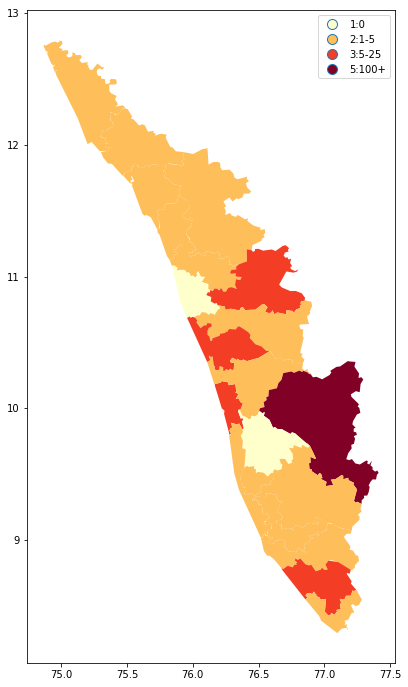

In [104]:
f,ax=plt.subplots(1,figsize=(12,12))
ax=kerala.plot(ax=ax,column='CaseCategory',legend=True,cmap='YlOrRd')
plt.show()

In [107]:
kerala[kerala.CriminalCases > 100]

,pc_id,st_code,st_name,pc_no,pc_name,pc_name_hi,pc_category,wikidata_qid,status,2019_election_phase,2019_election_date,geometry,SerialNo,Candidate,Party,CriminalCases,Education,Assest,Liabilities,CaseCategory
469,3213,32,Kerala,13,idukki,इदुक्की,GEN,Q3595503,None,3,2019-04-23,"(POLYGON ((77.19499999999999 10.355, 77.236 10...",109,Dean Kuriakose,INC,204.0,Post Graduate,"Rs 1,33,95,011","Rs 1,00,00,000,",5:100+


# Analyzing Uttar Pradesh

In [108]:
up=joined[joined['st_name']=='Uttar Pradesh']

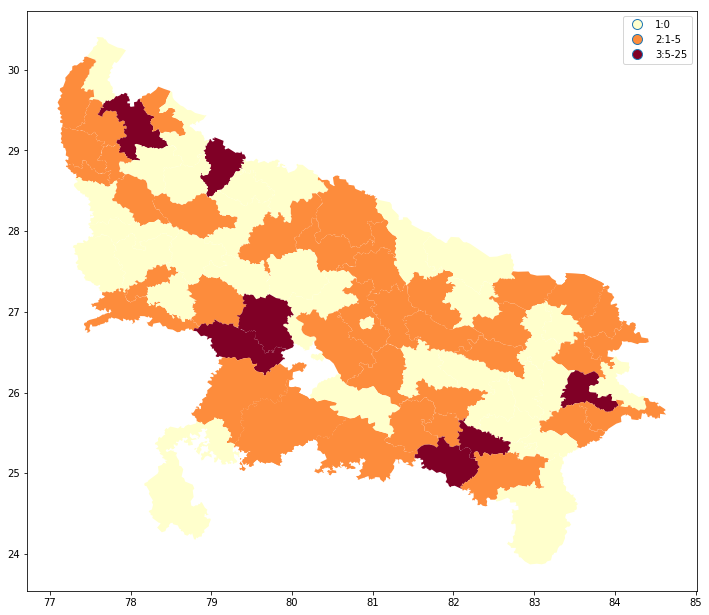

In [109]:
f,ax=plt.subplots(1,figsize=(12,12))
ax=up.plot(ax=ax,column='CaseCategory',legend=True,cmap='YlOrRd')
plt.show()

In [110]:
up[up.CriminalCases > 5]

,pc_id,st_code,st_name,pc_no,pc_name,pc_name_hi,pc_category,wikidata_qid,status,2019_election_phase,2019_election_date,geometry,SerialNo,Candidate,Party,CriminalCases,Education,Assest,Liabilities,CaseCategory
59,904,9,Uttar Pradesh,4,bijnor,बिजनौर,GEN,Q3633391,None,1,2019-04-11,"(POLYGON ((77.93000000000001 29.715, 77.962999...",275,Malook Nagar,BSP,7.0,Graduate,"Rs 2,49,96,28,021","Rs 1,01,61,48,176,",3:5-25
64,907,9,Uttar Pradesh,7,rampur,रामपुर,GEN,Q7290061,None,3,2019-04-23,"(POLYGON ((79.04900000000001 29.16, 79.152 29....",289,Mohammad Azam Khan,SP,10.0,Graduate Professional,"Rs 4,61,24,814","Rs 0,",3:5-25
115,941,9,Uttar Pradesh,41,etawah,इटावा,SC,Q5402455,None,4,2019-04-29,"(POLYGON ((79.08 26.882, 79.11 26.865, 79.116 ...",128,Dr Ram Shankar Katheria,BJP,12.0,Doctorate,"Rs 1,51,54,538","Rs 73,04,616,",3:5-25
116,942,9,Uttar Pradesh,42,kannauj,कन्नौज,GEN,Q12418036,None,4,2019-04-29,"(POLYGON ((79.42400000000001 27.226, 79.441 27...",474,Subrat Pathak,BJP,11.0,Graduate,"Rs 5,42,87,991","Rs 2,89,93,930,",3:5-25
124,952,9,Uttar Pradesh,52,allahabad,इलाहाबाद,GEN,Q4730342,None,6,2019-05-12,"(POLYGON ((81.874 25.454, 81.893 25.455, 81.89...",418,Rita Bahuguna Joshi,BJP,6.0,Doctorate,"Rs 2,69,19,330","Rs 16,00,000,",3:5-25
145,970,9,Uttar Pradesh,70,ghosi,घोसी,GEN,Q5557002,None,7,2019-05-19,"(POLYGON ((83.578 26.25, 83.616 26.247, 83.608...",53,Atul Kumar Singh,BSP,13.0,Graduate,"Rs 6,65,36,025","Rs 34,54,591,",3:5-25
153,978,9,Uttar Pradesh,78,bhadohi,भदोही,GEN,Q4900529,None,6,2019-05-12,"(POLYGON ((82.137 25.679, 82.161 25.678, 82.14...",392,Ramesh Chand,BJP,6.0,10th Pass,"Rs 9,40,89,148","Rs 2,16,96,413,",3:5-25


# Analysis of Education Qualification

In [190]:
joined.head(2)

,pc_id,st_code,st_name,pc_no,pc_name,pc_name_hi,pc_category,wikidata_qid,status,2019_election_phase,2019_election_date,geometry,SerialNo,Candidate,Party,CriminalCases,Education,Assest,Liabilities,CaseCategory
0,201,2,Himachal Pradesh,1,kangra,कांगड़ा,GEN,Q6362861,None,7,2019-05-19,"(POLYGON ((76.577 33.206, 76.598 33.204, 76.61...",245,Kishan Kapoor,BJP,2.0,12th Pass,"Rs 8,58,41,247","Rs 36,05,161,",2:1-5
1,202,2,Himachal Pradesh,2,mandi,मंडी,GEN,Q6748042,None,7,2019-05-19,"(POLYGON ((76.795 33.256, 76.81999999999999 33...",384,Ram Swaroop Sharma,BJP,0.0,10th Pass,"Rs 1,57,24,337","Rs 7,83,963,",1:0


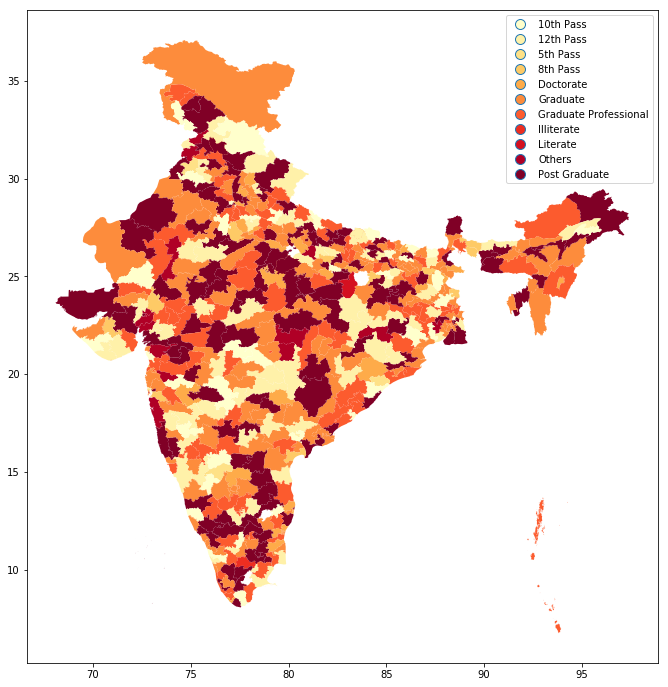

In [191]:
f,ax=plt.subplots(1,figsize=(12,12))
ax=joined.plot(ax=ax,column='Education',legend=True, cmap='YlOrRd')
plt.show()

# Correalation between Education and Criminality

In [192]:
joined.head(2)

,pc_id,st_code,st_name,pc_no,pc_name,pc_name_hi,pc_category,wikidata_qid,status,2019_election_phase,2019_election_date,geometry,SerialNo,Candidate,Party,CriminalCases,Education,Assest,Liabilities,CaseCategory
0,201,2,Himachal Pradesh,1,kangra,कांगड़ा,GEN,Q6362861,None,7,2019-05-19,"(POLYGON ((76.577 33.206, 76.598 33.204, 76.61...",245,Kishan Kapoor,BJP,2.0,12th Pass,"Rs 8,58,41,247","Rs 36,05,161,",2:1-5
1,202,2,Himachal Pradesh,2,mandi,मंडी,GEN,Q6748042,None,7,2019-05-19,"(POLYGON ((76.795 33.256, 76.81999999999999 33...",384,Ram Swaroop Sharma,BJP,0.0,10th Pass,"Rs 1,57,24,337","Rs 7,83,963,",1:0


In [193]:
joined.Education.unique()

array(['12th Pass', '10th Pass', 'Graduate', 'Post Graduate', 'Others',
       'Graduate Professional', '5th Pass', 'Doctorate', '8th Pass',
       'Literate', 'Illiterate'], dtype=object)

In [ ]:
# Others is mianly Diploma of different sorts
# literate is some under matriculate.

In [197]:
def edu_category(x):
    if x == 'Illiterate':
        return 0
    elif x == 'Literate':
        return 1
    elif x=='5th Pass':
        return 2
    elif x == '8th Pass':
        return 3
    elif x == '10th Pass':
        return 4
    elif x== '12th Pass':
        return 5
    elif x == 'Others':
        return 6
    elif x == 'Graduate':
        return 7
    elif x=='Graduate Professional':
        return 8
    elif x == 'Post Graduate':
        return 9
    else :
        return 10

joined['EduCategory']=joined['Education'].apply(edu_category)






In [200]:
joined.head(2)

,pc_id,st_code,st_name,pc_no,pc_name,pc_name_hi,pc_category,wikidata_qid,status,2019_election_phase,...,geometry,SerialNo,Candidate,Party,CriminalCases,Education,Assest,Liabilities,CaseCategory,EduCategory
0,201,2,Himachal Pradesh,1,kangra,कांगड़ा,GEN,Q6362861,None,7,...,"(POLYGON ((76.577 33.206, 76.598 33.204, 76.61...",245,Kishan Kapoor,BJP,2.0,12th Pass,"Rs 8,58,41,247","Rs 36,05,161,",2:1-5,5
1,202,2,Himachal Pradesh,2,mandi,मंडी,GEN,Q6748042,None,7,...,"(POLYGON ((76.795 33.256, 76.81999999999999 33...",384,Ram Swaroop Sharma,BJP,0.0,10th Pass,"Rs 1,57,24,337","Rs 7,83,963,",1:0,4


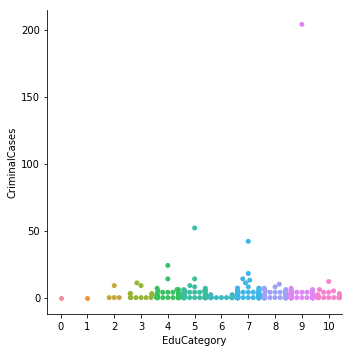

In [204]:
sns.catplot(x='EduCategory',y='CriminalCases', kind='swarm',data=joined)